In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/zomato-stock-price/zomato.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


In [2]:
print("Shape of the Data :",df.shape)

Shape of the Data : (631, 7)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       631 non-null    object 
 1   Open       631 non-null    float64
 2   High       631 non-null    float64
 3   Low        631 non-null    float64
 4   Close      631 non-null    float64
 5   Adj Close  631 non-null    float64
 6   Volume     631 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 34.6+ KB


In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
numeric_columns = df.select_dtypes(exclude="object").columns
categoric_columns = df.select_dtypes(include="object").columns
numeric_columns , categoric_columns

(Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object'),
 Index(['Date'], dtype='object'))

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       631 non-null    datetime64[ns]
 1   Open       631 non-null    float64       
 2   High       631 non-null    float64       
 3   Low        631 non-null    float64       
 4   Close      631 non-null    float64       
 5   Adj Close  631 non-null    float64       
 6   Volume     631 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 34.6 KB


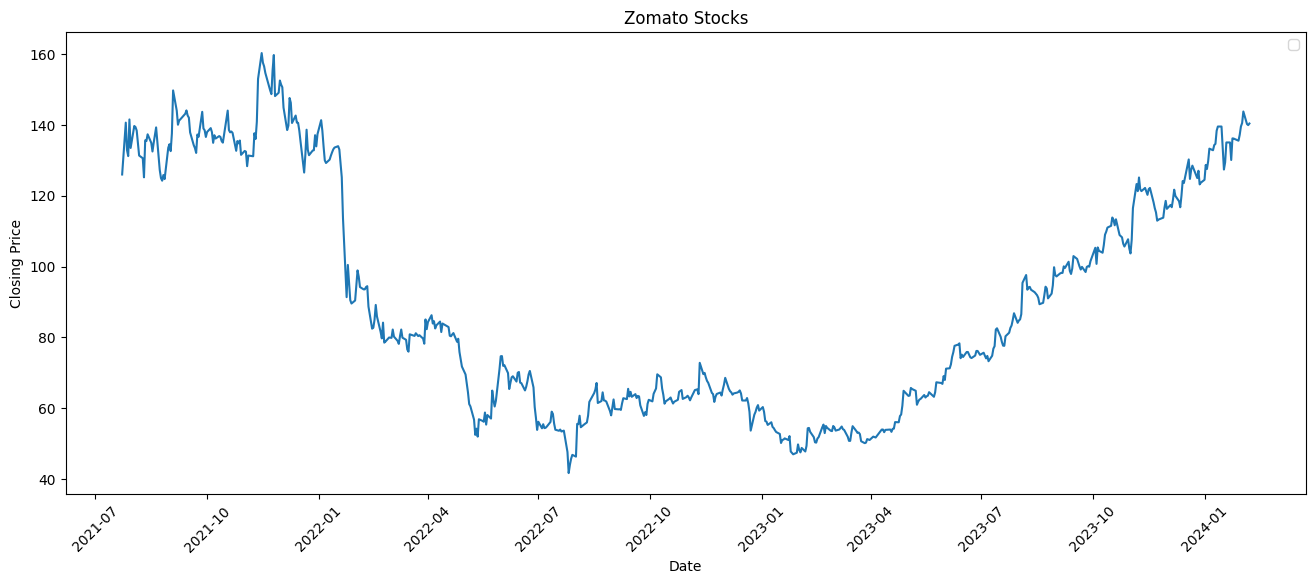

In [8]:
plt.figure(figsize=(16,6))
plt.plot(df['Date'],df['Close'])
plt.title("Zomato Stocks")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

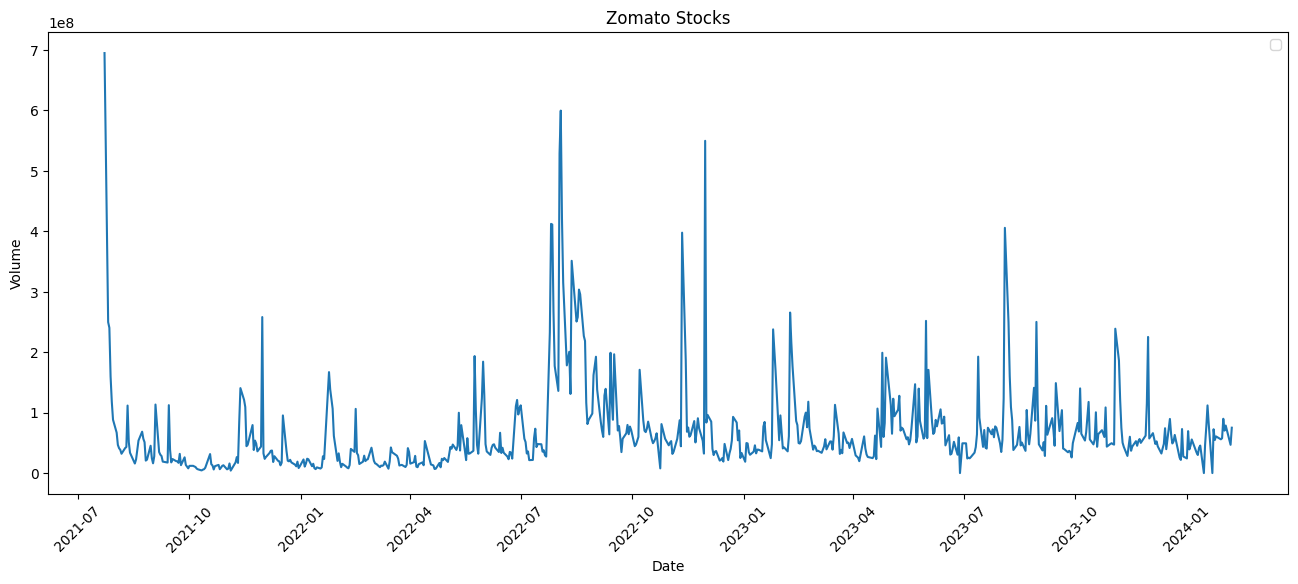

In [9]:
plt.figure(figsize=(16,6))
plt.plot(df['Date'],df['Volume'])
plt.title("Zomato Stocks")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.legend()
plt.show()

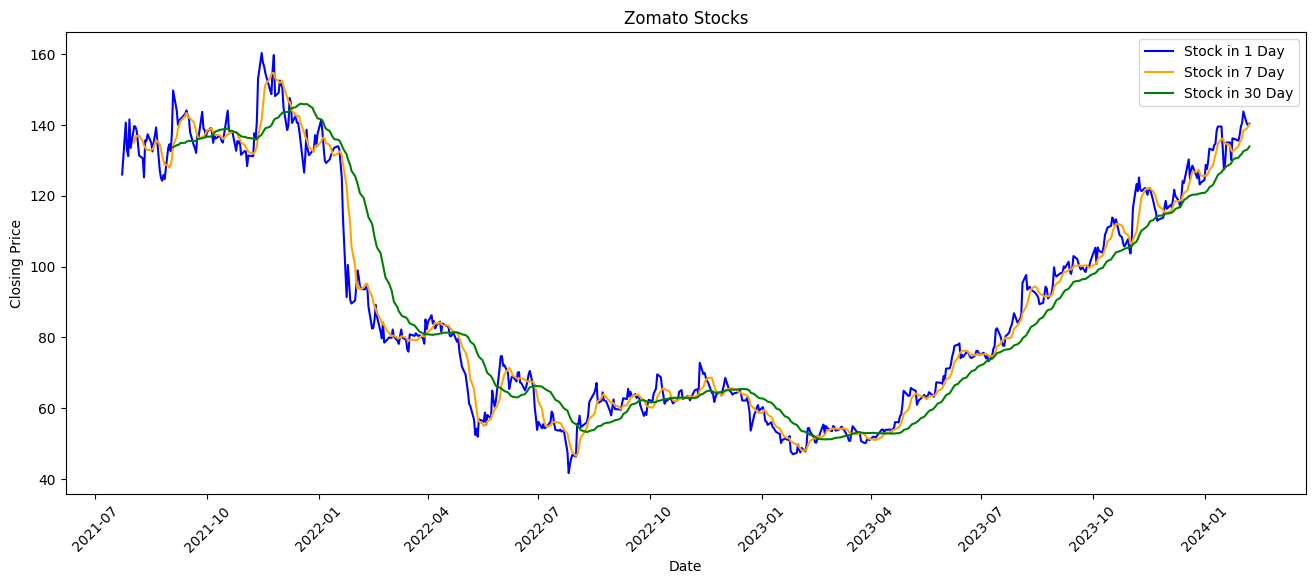

In [10]:
df['30_Day_MA'] = df['Close'].rolling(window=30).mean()
df['7_day_MA'] = df['Close'].rolling(window=7).mean()

plt.figure(figsize=(16,6))
plt.plot(df['Date'],df['Close'],color="b",label="Stock in 1 Day")
plt.plot(df['Date'],df['7_day_MA'],color="orange",label="Stock in 7 Day")
plt.plot(df['Date'],df['30_Day_MA'],color="green",label="Stock in 30 Day")
plt.title("Zomato Stocks")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


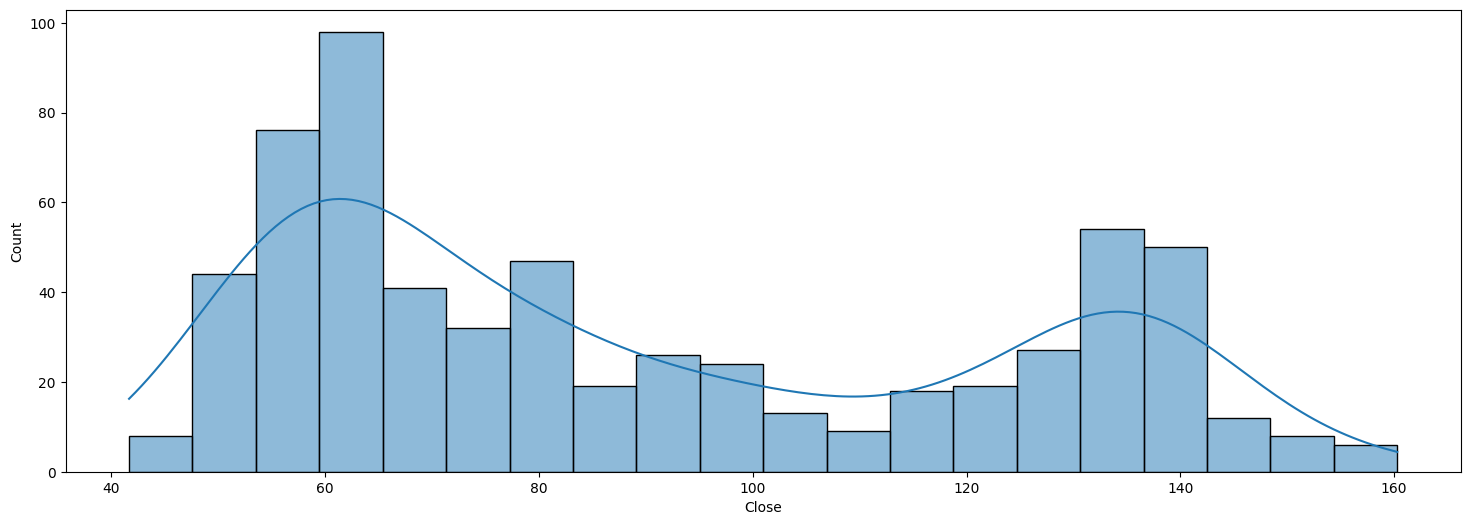

In [11]:
plt.figure(figsize=(18,6))
sns.histplot(x=df['Close'],kde=True,bins=20)
plt.show()